In [2]:
import torch
from torch import device
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
data_path = r'D:\Project\PyProject\pytorch_example\code\data\p1ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                        transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                               transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [4]:
lable_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img , lable_map[lable]) for img, lable in cifar10 if lable in lable_map]
cifar2_val = [(img, lable_map[lable]) for img, lable in cifar10_val if lable in lable_map]

In [5]:
import torch.nn as nn
n_out = 2

model = nn.Sequential(
    nn.Linear(
        3072,
        512
    ),
    nn.Tanh(),
    nn.Linear(
        512,
        n_out
    )
)

In [6]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()
x = torch.tensor([[1., 2.], [3., 4.]])
y = softmax(x)
softmax(x).sum()
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1., 2.], [3., 4.]])
softmax(x)

tensor([[0.2689, 0.7311],
        [0.2689, 0.7311]])

In [7]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


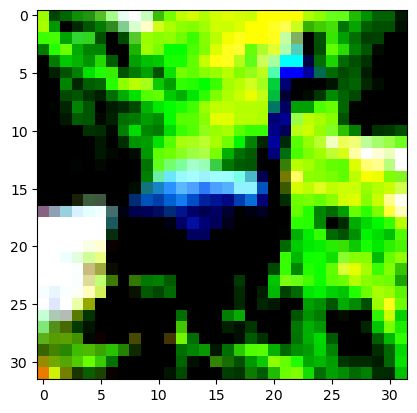

In [8]:
img, _ = cifar2[0]
print(img.shape)
plt.imshow(img.permute(1,2,0))
plt.show()

In [9]:
img_batch = img.view(-1).unsqueeze(0)
print(img_batch.shape)

out = model(img_batch)
out

torch.Size([1, 3072])


tensor([[0.6487, 0.3513]], grad_fn=<SoftmaxBackward0>)

In [10]:
_, index = torch.max(out, 1)
index

tensor([0])

In [11]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

loss_fn = nn.NLLLoss()

img_t, lable = cifar2[0]
out = model(img_t.view(-1).unsqueeze(0))
loss_fn(out, torch.tensor([lable]))

tensor(0.4935, grad_fn=<NllLossBackward0>)

In [12]:
# learn_rate = 1e-2
# optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)
# n_epochs = 100
# for epoch in range(n_epochs):
#     for img, lable in cifar2:
#         img = transforms.ToTensor()(img)
#         img.cuda()
#         out = model(img.view(-1).unsqueeze(0))
#         loss = loss_fn(out, torch.tensor([lable]))
#         
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     
#     print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [13]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

# model = nn.Sequential(
#     nn.Linear(3072, 512),
#     nn.Tanh(),
#     nn.Linear(512, n_out),
#     nn.LogSoftmax(dim=1)
# )

model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, n_out),
)
model = model.to(device)

learning_rate =  1e-2

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# loss_fn = nn.NLLLoss()

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, lables in train_loader:
        # imgs = transforms.ToTensor()(imgs)
        imgs = imgs.to(device)
        lables = lables.to(device)
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, lables)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.556922
Epoch: 1, Loss: 0.839678
Epoch: 2, Loss: 0.458897
Epoch: 3, Loss: 0.359138
Epoch: 4, Loss: 0.350833
Epoch: 5, Loss: 0.584086
Epoch: 6, Loss: 0.571088
Epoch: 7, Loss: 0.398520
Epoch: 8, Loss: 0.379349
Epoch: 9, Loss: 0.378169
Epoch: 10, Loss: 0.504596
Epoch: 11, Loss: 0.580246
Epoch: 12, Loss: 0.515234
Epoch: 13, Loss: 0.393399
Epoch: 14, Loss: 0.628006
Epoch: 15, Loss: 0.747715
Epoch: 16, Loss: 0.422298
Epoch: 17, Loss: 0.570519
Epoch: 18, Loss: 0.565788
Epoch: 19, Loss: 0.717294
Epoch: 20, Loss: 0.592915
Epoch: 21, Loss: 0.578362
Epoch: 22, Loss: 0.393254
Epoch: 23, Loss: 0.576483
Epoch: 24, Loss: 0.649737
Epoch: 25, Loss: 0.536724
Epoch: 26, Loss: 0.587037
Epoch: 27, Loss: 0.756247
Epoch: 28, Loss: 0.433684
Epoch: 29, Loss: 0.659900
Epoch: 30, Loss: 0.817603
Epoch: 31, Loss: 0.674738
Epoch: 32, Loss: 0.342220
Epoch: 33, Loss: 0.734636
Epoch: 34, Loss: 0.747087
Epoch: 35, Loss: 0.441718
Epoch: 36, Loss: 0.503041
Epoch: 37, Loss: 0.451662
Epoch: 38, Loss: 0.383

In [14]:
val_loder = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

model = model.cpu()

with (torch.no_grad()):
    for imgs, lables in val_loder:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs.data, 1)
        total += lables.size(0)
        correct += int(predicted.eq(lables).sum().item())
        
    print("Accuracy of the network on the 10000 test images: %d %%" % (correct/total*100))

Accuracy of the network on the 10000 test images: 75 %


In [15]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
conv, conv.weight.shape, conv.bias.shape

(Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 torch.Size([1, 3, 3, 3]),
 torch.Size([1]))

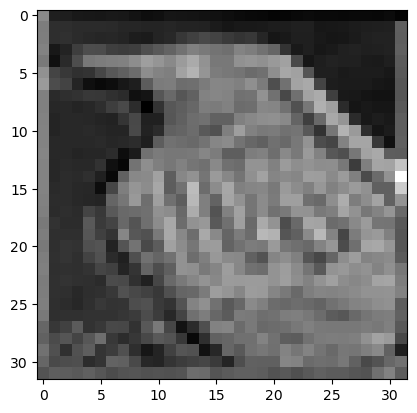

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [16]:
img, _ = cifar2[2]
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()
img.unsqueeze(0).shape, output.shape

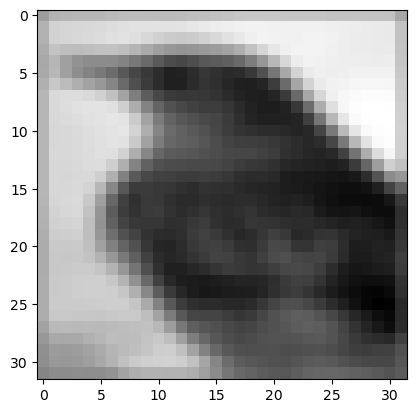

In [17]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

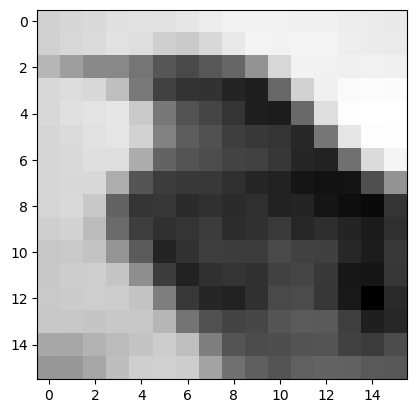

In [18]:
pool = nn.MaxPool2d(2)
output = pool(conv(img.unsqueeze(0)))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [19]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    # ...
    nn.Linear(8 * 8 * 8, 32),
    nn.Tanh(),
    nn.Linear(32, n_out),
)

In [20]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [21]:
# model(img.unsqueeze(0))

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool11 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool12 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, n_out)
        
    def forward(self, x):
        out = self.pool11(self.act1(self.conv1(x)))
        out = self.pool12(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        self.fc2(out)
        return out

In [26]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [27]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, n_out)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
        

In [28]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0113, -0.1712]], grad_fn=<AddmmBackward0>)

In [40]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(n_epochs + 1):
        loss_train = 0
        for imgs, lables in train_loader:
            
            imgs = imgs.to(device)
            lables = lables.to(device)
            
            outputs = model(imgs)
            
            loss = loss_fn(outputs, lables)
            
            optimizer.zero_grad()
            
            loss.backward()
            
            optimizer.step()
            
            loss_train += loss.item()
            
        if epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format( 
                datetime.datetime.now(), epoch, 
                loss_train / len(train_loader)))

In [42]:
from torch import optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device = device)

optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()


training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader
)

2024-05-30 13:31:00.179106 Epoch 0, Training loss 0.5616200012006577
2024-05-30 13:31:02.144076 Epoch 10, Training loss 0.33510166843226
2024-05-30 13:31:04.149272 Epoch 20, Training loss 0.30372113663299827
2024-05-30 13:31:06.165359 Epoch 30, Training loss 0.281037911108345
2024-05-30 13:31:08.181082 Epoch 40, Training loss 0.25856246699573127
2024-05-30 13:31:10.197109 Epoch 50, Training loss 0.2391421416193057
2024-05-30 13:31:12.073087 Epoch 60, Training loss 0.21959816635983764
2024-05-30 13:31:13.901091 Epoch 70, Training loss 0.20135911577826093
2024-05-30 13:31:15.735651 Epoch 80, Training loss 0.18775314557704198
2024-05-30 13:31:17.568301 Epoch 90, Training loss 0.17419740764103878
2024-05-30 13:31:19.429820 Epoch 100, Training loss 0.16006988391375085


In [44]:
val_loder = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loder in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, lables in loder:
                imgs = imgs.to(device)
                lables = lables.to(device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs.data, 1)
                total += lables.size(0)
                correct += int(predicted.eq(lables).sum().item())
                
        print("Accuracy of the network on the 10000 test images: %d %%" % (correct/total*100))
        
validate(model, train_loader, val_loder)

Accuracy of the network on the 10000 test images: 93 %
Accuracy of the network on the 10000 test images: 89 %


In [46]:
torch.save(model.state_dict(), data_path + 'birds_vs_plane_design_by_pupu_2405')
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_plane_design_by_pupu_2405'))

<All keys matched successfully>